# CaSR SWE File Combination Workflow

This notebook demonstrates how to combine NetCDF files from the CaSR SWE dataset using the `combine_casr_swe_files.py` script. The CaSR dataset contains files organized by variable types, spatial regions, and time periods that can be combined in different ways:

1. **Temporal combination**: Combine files across time periods
2. **Spatial combination**: Combine files across spatial regions  
3. **Full combination**: Combine both temporal and spatial dimensions

The CaSR SWE dataset includes:
- **Variable types**: A_PR24_SFC (precipitation) and P_SWE_LAND (snow water equivalent)
- **Spatial regions**: Different rlon/rlat coordinate ranges
- **Time periods**: 4-year chunks from 1980-2023

## Setup and Imports

**Note**: If you encounter NumPy compatibility errors, please run one of the following commands in your terminal before running this notebook:

**Option 1 (Recommended)**: Install from requirements file
```bash
pip install -r requirements_notebook.txt
```

**Option 2**: Manual installation with compatible versions
```bash
pip install "numpy<2" xarray pandas matplotlib netcdf4
```

**Option 3**: Using conda
```bash
conda install numpy=1.26 xarray pandas matplotlib netcdf4
```

**Option 4**: Create a new environment with compatible versions
```bash
conda create -n snowdrought python=3.9 numpy=1.26 xarray pandas matplotlib netcdf4 jupyter
conda activate snowdrought
```

In [16]:
# Check for NumPy compatibility issues
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='numpy')

# Import required packages
import sys
import os
from pathlib import Path

# Handle NumPy compatibility
try:
    import numpy as np
    print(f"NumPy version: {np.__version__}")
except ImportError as e:
    print(f"NumPy import error: {e}")
    print("Please install NumPy: pip install numpy")

# Import data science packages with error handling
try:
    import xarray as xr
    print(f"xarray version: {xr.__version__}")
except ImportError as e:
    print(f"xarray import error: {e}")
    print("If you encounter NumPy compatibility issues, try:")
    print("  pip install 'numpy<2' xarray pandas matplotlib")
    print("  or")
    print("  conda install numpy=1.26 xarray pandas matplotlib")
    raise

try:
    import pandas as pd
    print(f"pandas version: {pd.__version__}")
except ImportError as e:
    print(f"pandas import error: {e}")
    raise

try:
    import matplotlib.pyplot as plt
    print(f"matplotlib version: {plt.matplotlib.__version__}")
except ImportError as e:
    print(f"matplotlib import error: {e}")
    raise

# Add the project root to Python path to import the combine script
project_root = Path().cwd().parent.parent
sys.path.append(str(project_root))

# Import the CaSR file combiner
try:
    from combine_casr_swe_files import CaSRFileCombiner
    print("Successfully imported CaSRFileCombiner")
except ImportError as e:
    print(f"Error importing CaSRFileCombiner: {e}")
    print("Make sure combine_casr_swe_files.py is in the project root directory")
    raise

NumPy version: 1.26.4
xarray version: 2025.3.1
pandas version: 2.2.3
matplotlib version: 3.8.2
Successfully imported CaSRFileCombiner


## Configuration

Set up the input and output directories for your CaSR SWE data files.

In [17]:
# Define data paths - modify these paths according to your data location
input_dir = r"data/input_data/CaSR_SWE"  # Directory containing CaSR NetCDF files
output_dir = r"data/output_data/combined_casr"  # Directory for combined output files

# Create absolute paths
input_path = project_root / input_dir
output_path = project_root / output_dir

print(f"Input directory: {input_path}")
print(f"Output directory: {output_path}")
print(f"Input directory exists: {input_path.exists()}")

Input directory: c:\Users\askha\github\snowdroughtindex-main-1\data\input_data\CaSR_SWE
Output directory: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\combined_casr
Input directory exists: True


## Initialize the CaSR File Combiner

Create an instance of the `CaSRFileCombiner` class with your input and output directories.

In [18]:
# Initialize the file combiner
combiner = CaSRFileCombiner(input_dir=str(input_path), output_dir=str(output_path))

2025-06-25 18:11:43,238 - INFO - Input directory: c:\Users\askha\github\snowdroughtindex-main-1\data\input_data\CaSR_SWE
2025-06-25 18:11:43,239 - INFO - Output directory: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\combined_casr


## Explore Dataset Information

Before combining files, let's examine what data is available in the input directory.

In [19]:
# Get information about the available datasets
combiner.get_dataset_info()

2025-06-25 18:11:45,355 - INFO - Found 2 file groups:
2025-06-25 18:11:45,355 - INFO -   A_PR24_SFC: 44 files
2025-06-25 18:11:45,356 - INFO -   P_SWE_LAND: 44 files



CASR SWE DATASET INFORMATION

Group: A_PR24_SFC
Number of files: 44
Time coverage: 1980-2023
Spatial regions: 4
  rlon 211-245, rlat 386-420
  rlon 211-245, rlat 421-455
  rlon 246-280, rlat 386-420
  rlon 246-280, rlat 421-455
Variables: ['rotated_pole', 'CaSR_v3.1_A_PR24_SFC']
Dimensions: {'time': 35064, 'rlat': 35, 'rlon': 35}

Group: P_SWE_LAND
Number of files: 44
Time coverage: 1980-2023
Spatial regions: 4
  rlon 211-245, rlat 386-420
  rlon 211-245, rlat 421-455
  rlon 246-280, rlat 386-420
  rlon 246-280, rlat 421-455
Variables: ['rotated_pole', 'CaSR_v3.1_P_SWE_LAND']
Dimensions: {'time': 35064, 'rlat': 35, 'rlon': 35}


## Examine File Groups

Let's look at how the files are grouped by variable type.

In [20]:
# Get file groups
file_groups = combiner.get_file_groups()

print("Available file groups:")
for group_name, files in file_groups.items():
    print(f"\n{group_name}: {len(files)} files")
    
    # Show first few filenames as examples
    for i, file_path in enumerate(files[:3]):
        filename = Path(file_path).name
        print(f"  {i+1}. {filename}")
    
    if len(files) > 3:
        print(f"  ... and {len(files) - 3} more files")

2025-06-25 18:11:48,724 - INFO - Found 2 file groups:
2025-06-25 18:11:48,725 - INFO -   A_PR24_SFC: 44 files
2025-06-25 18:11:48,725 - INFO -   P_SWE_LAND: 44 files


Available file groups:

A_PR24_SFC: 44 files
  1. CaSR_v3.1_A_PR24_SFC_rlon211-245_rlat386-420_1980-1983.nc
  2. CaSR_v3.1_A_PR24_SFC_rlon211-245_rlat386-420_1984-1987.nc
  3. CaSR_v3.1_A_PR24_SFC_rlon211-245_rlat386-420_1988-1991.nc
  ... and 41 more files

P_SWE_LAND: 44 files
  1. CaSR_v3.1_P_SWE_LAND_rlon211-245_rlat386-420_1980-1983.nc
  2. CaSR_v3.1_P_SWE_LAND_rlon211-245_rlat386-420_1984-1987.nc
  3. CaSR_v3.1_P_SWE_LAND_rlon211-245_rlat386-420_1988-1991.nc
  ... and 41 more files


## Example: Parse Individual Filenames

Let's examine how the filename parsing works for understanding the file structure.

In [ ]:
# Get a sample file and parse its filename
if file_groups:
    # Get the first file from the first group
    first_group = list(file_groups.keys())[0]
    sample_file = file_groups[first_group][0]
    sample_filename = Path(sample_file).name
    
    print(f"Sample filename: {sample_filename}")
    
    # Parse the filename
    parsed_info = combiner.parse_filename(sample_filename)
    
    print("\nParsed information:")
    for key, value in parsed_info.items():
        print(f"  {key}: {value}")
else:
    print("No files found in the input directory. Please check your input path.")

## Combination Options

Now let's demonstrate the different ways to combine the CaSR files.

### Option 1: Temporal Combination Only

Combine files across time periods while keeping spatial regions separate.

In [ ]:
# Temporal combination only
print("Performing temporal combination (keeping spatial regions separate)...")
combiner.combine_by_variable(combine_spatial=False, combine_temporal=True)
print("Temporal combination completed!")

### Option 2: Spatial Combination Only

Combine files across spatial regions while keeping time periods separate.

In [ ]:
# Spatial combination only
print("Performing spatial combination (keeping time periods separate)...")
combiner.combine_by_variable(combine_spatial=True, combine_temporal=False)
print("Spatial combination completed!")

### Option 3: Full Combination

Combine files across both spatial and temporal dimensions to create complete datasets.

In [ ]:
# Full combination (both spatial and temporal)
print("Performing full combination (both spatial and temporal)...")
combiner.combine_by_variable(combine_spatial=True, combine_temporal=True)
print("Full combination completed!")

## Examine Combined Output Files

Let's check what files were created in the output directory.

In [21]:
# List output files
output_files = list(output_path.glob('*.nc'))

print(f"Combined files created in {output_path}:")
print(f"Total files: {len(output_files)}\n")

for i, file_path in enumerate(output_files, 1):
    file_size = file_path.stat().st_size / (1024**2)  # Size in MB
    print(f"{i}. {file_path.name} ({file_size:.1f} MB)")

Combined files created in c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\combined_casr:
Total files: 2

1. CaSR_v3.1_A_PR24_SFC_combined_full.nc (7494.4 MB)
2. CaSR_v3.1_P_SWE_LAND_combined_full.nc (7352.7 MB)


## Extract Elevation Data from Combined Files

Now that we have combined the CaSR SWE files, let's extract data at specific elevation points using the optimized elevation data extractor. This allows us to track SWE and precipitation data at different elevation levels.

In [22]:
# Import the optimized elevation data extractor
try:
    from extract_elevation_data_optimized import OptimizedElevationDataExtractor
    print("Successfully imported OptimizedElevationDataExtractor")
except ImportError as e:
    print(f"Error importing OptimizedElevationDataExtractor: {e}")
    print("Make sure extract_elevation_data_optimized.py is in the project root directory")
    raise

Successfully imported OptimizedElevationDataExtractor


### Configure Elevation Data Extraction

Set up the paths for elevation data and configure extraction parameters.

In [23]:
# Define elevation data paths
elevation_dir = r"data/input_data/Elevation"  # Directory containing elevation shapefiles
elevation_output_dir = r"data/output_data/elevation"  # Directory for elevation extraction output

# Create absolute paths
elevation_path = project_root / elevation_dir
elevation_output_path = project_root / elevation_output_dir

print(f"Elevation data directory: {elevation_path}")
print(f"Elevation output directory: {elevation_output_path}")
print(f"Elevation directory exists: {elevation_path.exists()}")

# Initialize the elevation data extractor
elevation_extractor = OptimizedElevationDataExtractor(
    elevation_dir=str(elevation_path),
    combined_casr_dir=str(output_path),  # Use the output from CaSR combination
    output_dir=str(elevation_output_path)
)

Elevation data directory: c:\Users\askha\github\snowdroughtindex-main-1\data\input_data\Elevation
Elevation output directory: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\elevation
Elevation directory exists: True


### Load and Explore Elevation Data

Load the elevation shapefile to see what elevation points are available for data extraction.

In [24]:
# Load elevation data
elevation_extractor.load_elevation_data()

# Display basic information about elevation points
if elevation_extractor.elevation_gdf is not None:
    print(f"\nTotal elevation points: {len(elevation_extractor.elevation_gdf)}")
    print(f"\nFirst 5 elevation points:")
    print(elevation_extractor.elevation_gdf.head())
    
    # Show elevation statistics if available
    elev_cols = [col for col in elevation_extractor.elevation_gdf.columns 
                 if 'elev' in col.lower() or col in ['min', 'max', 'mean', 'median']]
    if elev_cols:
        print(f"\nElevation statistics:")
        for col in elev_cols:
            if pd.api.types.is_numeric_dtype(elevation_extractor.elevation_gdf[col]):
                print(f"  {col}:")
                print(f"    Min: {elevation_extractor.elevation_gdf[col].min():.1f}")
                print(f"    Max: {elevation_extractor.elevation_gdf[col].max():.1f}")
                print(f"    Mean: {elevation_extractor.elevation_gdf[col].mean():.1f}")

2025-06-25 18:12:24,574 - INFO - Loading elevation data...
2025-06-25 18:12:24,575 - INFO - Loading shapefile: c:\Users\askha\github\snowdroughtindex-main-1\data\input_data\Elevation\Bow_elevation_combined.shp
2025-06-25 18:12:24,994 - INFO - Loaded 13 elevation points
2025-06-25 18:12:24,994 - INFO - Elevation data columns: ['PROVCD_1', 'VALDATE', 'EDITION', 'DATASETNAM', 'VERSION', 'COMPLEVEL', 'WSCMDA', 'WSCSDA', 'WSCSSDA', 'FDA', 'OCEAN', 'WSCMDANAME', 'WSCSDANAME', 'WSCSSDANAM', 'min', 'max', 'mean', 'count', 'std', 'median', 'PROVCD_2', 'elev_class', 'geometry']
2025-06-25 18:12:24,995 - INFO - CRS: None
2025-06-25 18:12:24,996 - INFO - Elevation-related columns: ['min', 'max', 'mean', 'median', 'elev_class']
2025-06-25 18:12:24,997 - INFO - min range: 0.0 - 1440.0
2025-06-25 18:12:24,998 - INFO - max range: 998.0 - 3490.0
2025-06-25 18:12:24,999 - INFO - mean range: 772.4 - 2163.8
2025-06-25 18:12:25,000 - INFO - median range: 764.0 - 2182.0



Total elevation points: 13

First 5 elevation points:
  PROVCD_1   VALDATE EDITION DATASETNAM VERSION COMPLEVEL WSCMDA WSCSDA  \
0       AB  20070208       1    05BM000       0   NHN-CL1     05    05B   
1       AB  20070130       1    05BN000       0   NHN-CL1     05    05B   
2       AB  20070226       1    05BH000       0   NHN-CL1     05    05B   
3       AB  20070228       1    05BK000       0   NHN-CL1     05    05B   
4       AB  20070302       1    05BE000       0   NHN-CL1     05    05B   

  WSCSSDA   FDA  ...                 WSCSSDANAM     min     max         mean  \
0    05BM  05BM  ...       Lower Bow - Crowfoot   776.0  1177.0   953.688214   
1    05BN  05BN  ...          Lower Bow - Mouth   700.0   998.0   772.376015   
2    05BH  05BH  ...  Central Bow - Jumpingpond  1038.0  2479.0  1259.913722   
3    05BK  05BK  ...               Fish (Alta.)   981.0  1777.0  1226.170423   
4    05BE  05BE  ...      Upper Bow - Policeman  1146.0  3054.0  1601.837836   

     count   

### Check Available Combined CaSR Files

Let's see what combined CaSR files are available for elevation data extraction.

In [25]:
# Get available combined CaSR files
temporal_files, full_files = elevation_extractor.get_combined_casr_files()

print("Available files for elevation extraction:")
print(f"\nTemporal combined files ({len(temporal_files)}):")
for i, file in enumerate(temporal_files[:3], 1):
    print(f"  {i}. {file.name}")
if len(temporal_files) > 3:
    print(f"  ... and {len(temporal_files) - 3} more files")

print(f"\nFull combined files ({len(full_files)}):")
for i, file in enumerate(full_files[:3], 1):
    print(f"  {i}. {file.name}")
if len(full_files) > 3:
    print(f"  ... and {len(full_files) - 3} more files")

2025-06-25 18:12:33,012 - INFO - Found 0 temporal combined files
2025-06-25 18:12:33,013 - INFO - Found 2 full combined files


Available files for elevation extraction:

Temporal combined files (0):

Full combined files (2):
  1. CaSR_v3.1_A_PR24_SFC_combined_full.nc
  2. CaSR_v3.1_P_SWE_LAND_combined_full.nc


### Extract Elevation Data with Optimization

Extract data at elevation points from the combined CaSR files. We'll use time sampling to handle large datasets efficiently.

In [27]:
# Configure extraction parameters
time_sampling = 'all'  # Options: 'all', 'monthly', 'yearly', 'sample'
max_records = 10000  # Maximum records per point to avoid memory issues
file_types = ['temporal', 'full']  # Which file types to process

print(f"Extraction configuration:")
print(f"  Time sampling: {time_sampling}")
print(f"  Max records per point: {max_records}")
print(f"  File types to process: {file_types}")
print(f"\nStarting elevation data extraction...")

# Process all files and extract elevation data
extraction_results = elevation_extractor.process_all_files(
    file_types=file_types,
    time_sampling=time_sampling,
    max_records=max_records
)

print(f"\nExtraction completed!")
print(f"Processed {len(extraction_results)} file groups")

2025-06-25 18:13:27,480 - INFO - Found 0 temporal combined files
2025-06-25 18:13:27,481 - INFO - Found 2 full combined files
2025-06-25 18:13:27,481 - INFO - Processing temporal combined files...
2025-06-25 18:13:27,482 - INFO - Processing full combined files...
2025-06-25 18:13:27,483 - INFO - Processing CaSR_v3.1_A_PR24_SFC_combined_full.nc...
2025-06-25 18:13:27,500 - INFO - Dataset variables: ['rotated_pole', 'CaSR_v3.1_A_PR24_SFC']
2025-06-25 18:13:27,501 - INFO - Dataset dimensions: {'time': 385704, 'rlon': 70, 'rlat': 70}
2025-06-25 18:13:27,503 - INFO - Time dimension size: 385704


Extraction configuration:
  Time sampling: all
  Max records per point: 10000
  File types to process: ['temporal', 'full']

Starting elevation data extraction...


2025-06-25 18:15:14,321 - INFO - Extracted data for 5014152 records from 13 points
2025-06-25 18:15:15,124 - INFO - Processing CaSR_v3.1_P_SWE_LAND_combined_full.nc...
2025-06-25 18:15:15,138 - INFO - Dataset variables: ['rotated_pole', 'CaSR_v3.1_P_SWE_LAND']
2025-06-25 18:15:15,139 - INFO - Dataset dimensions: {'time': 385704, 'rlon': 70, 'rlat': 70}
2025-06-25 18:15:15,143 - INFO - Time dimension size: 385704
2025-06-25 18:17:04,361 - INFO - Extracted data for 5014152 records from 13 points



Extraction completed!
Processed 2 file groups


### Save Extracted Data

Save the extracted elevation data to files for further analysis.

In [28]:
# Save results in multiple formats
output_format = 'both'  # Options: 'csv', 'parquet', 'both'

print(f"Saving extracted data in {output_format} format...")
elevation_extractor.save_results(extraction_results, format=output_format)

# Generate summary report
elevation_extractor.generate_summary_report(extraction_results)

2025-06-25 18:17:10,720 - INFO - Saving results to c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\elevation


Saving extracted data in both format...


2025-06-25 18:17:49,328 - INFO - Saved CSV: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\elevation\elevation_extracted_full_CaSR_v3.1_A_PR24_SFC_combined_full.csv
2025-06-25 18:17:50,781 - INFO - Saved Parquet: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\elevation\elevation_extracted_full_CaSR_v3.1_A_PR24_SFC_combined_full.parquet
2025-06-25 18:18:27,506 - INFO - Saved CSV: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\elevation\elevation_extracted_full_CaSR_v3.1_P_SWE_LAND_combined_full.csv
2025-06-25 18:18:28,694 - INFO - Saved Parquet: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\elevation\elevation_extracted_full_CaSR_v3.1_P_SWE_LAND_combined_full.parquet
2025-06-25 18:18:28,695 - INFO - Generating summary report...
2025-06-25 18:18:28,778 - INFO - Summary saved to: c:\Users\askha\github\snowdroughtindex-main-1\data\output_data\elevation\extraction_summary_optimized.json



OPTIMIZED EXTRACTION SUMMARY
Elevation points processed: 13
Files processed: 2
Total records extracted: 10028304

File details:
  full_CaSR_v3.1_A_PR24_SFC_combined_full:
    Records: 5014152
    Variables: elevation_min, elevation_max, elevation_mean, elevation_median, CaSR_v3.1_A_PR24_SFC
    Time range: 1979-12-31T13:00:00 to 2023-12-31T12:00:00
  full_CaSR_v3.1_P_SWE_LAND_combined_full:
    Records: 5014152
    Variables: elevation_min, elevation_max, elevation_mean, elevation_median, CaSR_v3.1_P_SWE_LAND
    Time range: 1979-12-31T13:00:00 to 2023-12-31T12:00:00


### Visualize Extracted Data

Let's create some visualizations to understand the extracted elevation data.

Visualizing data from: full_CaSR_v3.1_A_PR24_SFC_combined_full
Data shape: (5014152, 11)
Columns: ['point_id', 'original_lon', 'original_lat', 'grid_lon', 'grid_lat', 'elevation_min', 'elevation_max', 'elevation_mean', 'elevation_median', 'time', 'CaSR_v3.1_A_PR24_SFC']


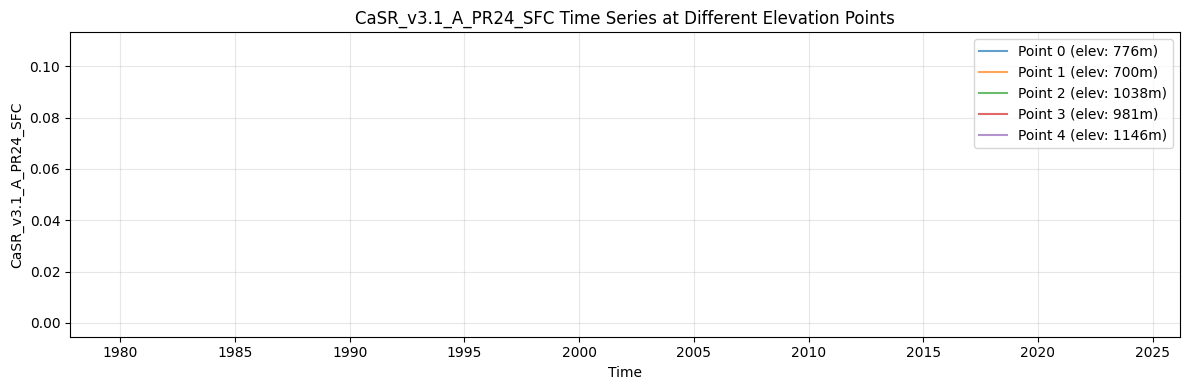

In [29]:
# Select a sample result for visualization
if extraction_results:
    # Get the first available result
    sample_key = list(extraction_results.keys())[0]
    sample_df = extraction_results[sample_key]
    
    print(f"Visualizing data from: {sample_key}")
    print(f"Data shape: {sample_df.shape}")
    print(f"Columns: {list(sample_df.columns)}")
    
    # Check if we have time series data
    if 'time' in sample_df.columns and len(sample_df) > 0:
        # Get data variables (exclude metadata columns)
        data_vars = [col for col in sample_df.columns 
                    if col not in ['point_id', 'original_lon', 'original_lat', 
                                  'grid_lon', 'grid_lat', 'time'] 
                    and not col.startswith('elevation_')]
        
        if data_vars:
            # Plot time series for a few points
            fig, axes = plt.subplots(len(data_vars), 1, figsize=(12, 4*len(data_vars)), squeeze=False)
            
            # Select a few points to plot
            unique_points = sample_df['point_id'].unique()[:5]  # Plot up to 5 points
            
            for i, var in enumerate(data_vars):
                ax = axes[i, 0]
                
                for point_id in unique_points:
                    point_data = sample_df[sample_df['point_id'] == point_id]
                    if len(point_data) > 0:
                        # Get elevation info if available
                        elev_info = ""
                        elev_cols = [col for col in point_data.columns if col.startswith('elevation_')]
                        if elev_cols:
                            elev_val = point_data[elev_cols[0]].iloc[0]
                            if pd.notna(elev_val):
                                elev_info = f" (elev: {elev_val:.0f}m)"
                        
                        ax.plot(point_data['time'], point_data[var], 
                               label=f'Point {point_id}{elev_info}', alpha=0.7)
                
                ax.set_xlabel('Time')
                ax.set_ylabel(var)
                ax.set_title(f'{var} Time Series at Different Elevation Points')
                ax.legend()
                ax.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
    else:
        print("No time series data available for visualization")
else:
    print("No extraction results available for visualization")

### Analyze Elevation-Based Patterns

Let's analyze how SWE and precipitation vary with elevation.

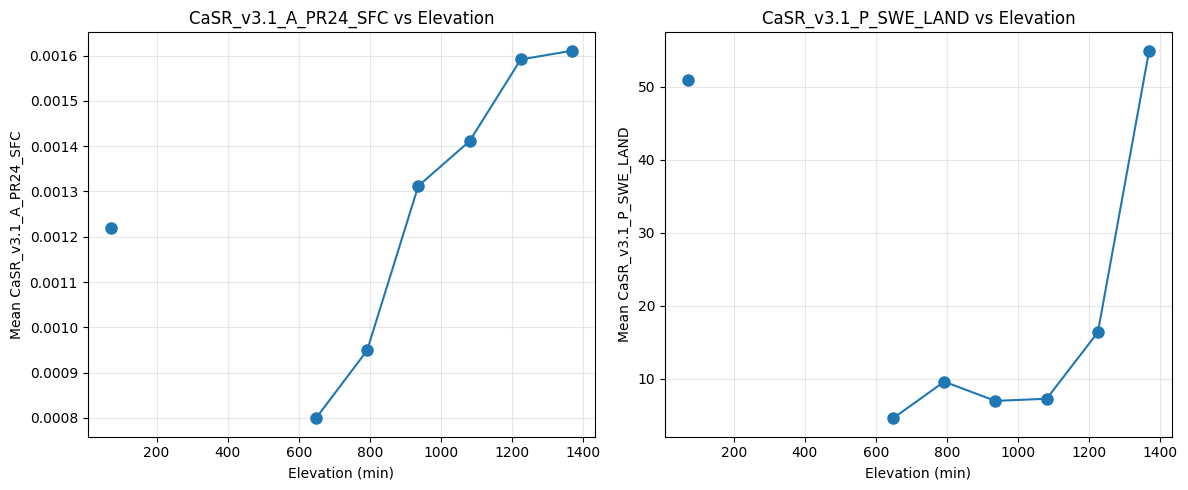


Elevation-based summary statistics:
                  CaSR_v3.1_A_PR24_SFC  CaSR_v3.1_P_SWE_LAND
elevation_bin                                               
(-1.44, 144.0]                0.001219             50.897767
(144.0, 288.0]                     NaN                   NaN
(288.0, 432.0]                     NaN                   NaN
(432.0, 576.0]                     NaN                   NaN
(576.0, 720.0]                0.000799              4.562442
(720.0, 864.0]                0.000949              9.585195
(864.0, 1008.0]               0.001312              6.951803
(1008.0, 1152.0]              0.001411              7.243513
(1152.0, 1296.0]              0.001591             16.358579
(1296.0, 1440.0]              0.001611             54.906277


In [30]:
# Analyze elevation-based patterns
if extraction_results:
    # Combine all results for analysis
    all_data = []
    
    for key, df in extraction_results.items():
        if df is not None and not df.empty:
            df['source_file'] = key
            all_data.append(df)
    
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        
        # Find elevation columns
        elev_cols = [col for col in combined_df.columns if col.startswith('elevation_')]
        
        if elev_cols and 'time' in combined_df.columns:
            # Use the first elevation column
            elev_col = elev_cols[0]
            
            # Calculate mean values by elevation bins
            combined_df['elevation_bin'] = pd.cut(combined_df[elev_col], bins=10)
            
            # Get data variables
            data_vars = [col for col in combined_df.columns 
                        if col not in ['point_id', 'original_lon', 'original_lat', 
                                      'grid_lon', 'grid_lat', 'time', 'source_file', 
                                      'elevation_bin'] 
                        and not col.startswith('elevation_')]
            
            if data_vars:
                # Calculate mean values by elevation bin
                elevation_means = combined_df.groupby('elevation_bin')[data_vars].mean()
                
                # Plot elevation patterns
                fig, axes = plt.subplots(1, len(data_vars), figsize=(6*len(data_vars), 5), squeeze=False)
                
                for i, var in enumerate(data_vars):
                    ax = axes[0, i]
                    
                    # Get elevation bin centers for x-axis
                    bin_centers = elevation_means.index.map(lambda x: x.mid)
                    
                    ax.plot(bin_centers, elevation_means[var], 'o-', markersize=8)
                    ax.set_xlabel(f'Elevation ({elev_col.replace("elevation_", "")})')
                    ax.set_ylabel(f'Mean {var}')
                    ax.set_title(f'{var} vs Elevation')
                    ax.grid(True, alpha=0.3)
                
                plt.tight_layout()
                plt.show()
                
                # Print summary statistics
                print("\nElevation-based summary statistics:")
                print(elevation_means)
        else:
            print("No elevation or time data available for pattern analysis")
    else:
        print("No data available for analysis")
else:
    print("No extraction results available for analysis")

## Summary

This workflow demonstrates:

1. **CaSR SWE File Combination**: How to combine NetCDF files from the CaSR dataset across temporal and spatial dimensions
2. **Elevation Data Extraction**: How to extract SWE and precipitation data at specific elevation points
3. **Data Tracking**: How to track and analyze the variation of snow and precipitation data with elevation

The extracted elevation data can be used for:
- Analyzing elevation gradients in SWE and precipitation
- Understanding snow accumulation patterns at different elevations
- Validating model outputs against elevation-specific observations
- Supporting drought analysis at various elevation zones

The output files are saved in both CSV and Parquet formats for easy integration with other analysis tools.